# Algerian Forest Fire DataSet:
The dataset includes 244 instances that regroup a data of two regions of Algeria, namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.
122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attributes and 1 output attribute (class)
The 244 instances have been classified into fire (138 classes) and not fire (106 classes) classes.
1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
2. Weather data observations
3. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
4. RH : Relative Humidity in %: 21 to 90
5. Ws :Wind speed in km/h: 6 to 29
6. Rain: total day in mm: 0 to 16.8
7. FWI Components
8. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
9. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
10. Drought Code (DC) index from the FWI system: 7 to 220.4
11. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
12. Buildup Index (BUI) index from the FWI system: 1.1 to 68
13. Fire Weather Index (FWI) Index: 0 to 31.1
14. Classes: two classes, namely â€œFireâ€ and â€œnot Fireâ€

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Algerian_forest_fires_dataset.csv")

# DataCleaning

In [4]:
df.head(1)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [6]:
#  missing values
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [7]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


The dataset is converted into 2 sets based on Region from 122th index , we can make a new column based on regions
1. Bejaia Region Datset
2. Sidi-Bel Abbes Region Datset

In [8]:
df.loc[:122,"Region"] = 0
df.loc[122:,"Region"] = 1

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       247 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.1+ KB


In [10]:
# Chnaging datatype
df[["Region"]] = df[["Region"]].astype(int)
df[["Region"]]

,Region
0,0
1,0
2,0
3,0
4,0
...,...
242,1
243,1
244,1
245,1


# Handling Missing Values

In [12]:
df.drop(index = [122,123] , inplace = True)

In [13]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1


In [14]:
df.reset_index(drop=True, inplace=True)

In [15]:
df.columns = df.columns.str.strip()

In [16]:
mode_value = df["Classes"].mode().iloc[0]

In [17]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [18]:
df["Classes"].fillna(mode_value , inplace =True)

In [19]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [20]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [21]:
df.iloc[122:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1
123,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1
124,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1
125,3,6,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1
126,4,6,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
241,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
242,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
243,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [22]:
df = df.drop(122).reset_index(drop = True)

In [23]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
 14  Region       244 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.7+ KB


In [25]:
# Convert columns to integer
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    int64 
 1   month        244 non-null    int64 
 2   year         244 non-null    int64 
 3   Temperature  244 non-null    int64 
 4   RH           244 non-null    int64 
 5   Ws           244 non-null    int64 
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
 14  Region       244 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.7+ KB


In [27]:
objects = [features for features in df.columns if df[features].dtype == 'O']

In [28]:
object_columns = df.select_dtypes(include='object').columns
for col in object_columns:
    if col != 'Classes':
        print(f"Column: {col}")
        print(df[col].unique())

Column: Rain
['0' '1.3' '13.1' '2.5' '0.2' '1.2' '0.5' '3.1' '0.7' '0.6' '0.3' '0.1'
 '0.4' '1' '1.4' '0.8' '16.8' '7.2' '10.1' '3.8' '0.9' '1.8' '4.6' '8.3'
 '5.8' '4' '2' '4.7' '8.7' '4.5' '1.1' '1.7' '2.2' '6' '1.9' '2.9' '4.1'
 '6.5' '4.4']
Column: FFMC
['65.7' '64.4' '47.1' '28.6' '64.8' '82.6' '88.2' '86.6' '52.9' '73.2'
 '84.5' '84' '50' '59' '49.4' '36.1' '37.3' '56.9' '79.9' '59.8' '81'
 '79.1' '81.4' '85.9' '86.7' '86.8' '89' '89.1' '88.7' '59.9' '55.7'
 '63.1' '80.1' '87' '80' '85.6' '66.6' '81.1' '75.1' '81.8' '73.9' '60.7'
 '72.6' '82.8' '85.4' '88.1' '73.4' '68.2' '70' '84.3' '89.2' '90.3'
 '86.5' '87.2' '78.8' '78' '76.6' '85' '86.4' '77.1' '87.4' '88.9' '81.3'
 '82.4' '80.2' '89.3' '89.4' '88.3' '88.6' '89.5' '85.8' '84.9' '90.1'
 '72.7' '52.5' '46' '30.5' '42.6' '68.4' '80.8' '75.8' '69.6' '62' '56.1'
 '58.5' '71' '40.9' '47.4' '44.9' '78.1' '87.7' '83.8' '87.8' '77.8'
 '73.7' '68.3' '48.6' '82' '85.7' '77.5' '45' '57.1' '48.7' '79.4' '83.7'
 '71.4' '90.6' '72.3' '53.4

In [29]:
# objects1 = [features for features in df.columns if df[features].dtype == 'O']
# for i in objects1:
#     if i!="Classes":
#         df[i] = df[i].astype(float)
# Identify columns with object data type
object_columns = df.select_dtypes(include='object').columns

# Clean and convert
for col in object_columns:
    if col != 'Classes':  # Skip 'Classes' column
        df[col] = df[col].replace(r'[^\d.]', '', regex=True)  # Remove non-numeric characters
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      244 non-null    object 
 14  Region       244 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.7+ KB


In [31]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,243.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288484,4.774180,16.664754,7.035391,0.500000
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619393,4.175318,14.204824,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.200000,0.500000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [32]:
object_columns = df.select_dtypes(include='float').columns
for col in object_columns:
    if col != 'Classes':
        print(f"Column: {col}")
        print(df[col].unique())

Column: Rain
[ 0.   1.3 13.1  2.5  0.2  1.2  0.5  3.1  0.7  0.6  0.3  0.1  0.4  1.
  1.4  0.8 16.8  7.2 10.1  3.8  0.9  1.8  4.6  8.3  5.8  4.   2.   4.7
  8.7  4.5  1.1  1.7  2.2  6.   1.9  2.9  4.1  6.5  4.4]
Column: FFMC
[65.7 64.4 47.1 28.6 64.8 82.6 88.2 86.6 52.9 73.2 84.5 84.  50.  59.
 49.4 36.1 37.3 56.9 79.9 59.8 81.  79.1 81.4 85.9 86.7 86.8 89.  89.1
 88.7 59.9 55.7 63.1 80.1 87.  80.  85.6 66.6 81.1 75.1 81.8 73.9 60.7
 72.6 82.8 85.4 88.1 73.4 68.2 70.  84.3 89.2 90.3 86.5 87.2 78.8 78.
 76.6 85.  86.4 77.1 87.4 88.9 81.3 82.4 80.2 89.3 89.4 88.3 88.6 89.5
 85.8 84.9 90.1 72.7 52.5 46.  30.5 42.6 68.4 80.8 75.8 69.6 62.  56.1
 58.5 71.  40.9 47.4 44.9 78.1 87.7 83.8 87.8 77.8 73.7 68.3 48.6 82.
 85.7 77.5 45.  57.1 48.7 79.4 83.7 71.4 90.6 72.3 53.4 66.8 62.2 65.5
 64.6 60.2 86.2 78.3 74.2 85.3 86.  92.5 79.7 63.7 87.6 84.7 88.  90.5
 82.3 74.8 85.2 84.6 86.1 89.9 93.9 91.5 87.3 72.8 73.8 87.5 93.3 93.7
 93.8 70.5 69.7 91.7 94.2 93.  91.9 83.9 92.  96.  94.3 82.7 91.2 92.

In [34]:
## let save the cleaned dataset
df.to_csv("algerban cleaned dataset.csv", index = False)

# Exploratory Data Analysis

In [35]:
df_1 = df.drop(["day","month","year"],axis =1)

In [36]:
df_1

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [37]:
df_1.Classes.unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [38]:
# Strip leading and trailing whitespace and normalize case
df_1['Classes'] = df_1['Classes'].str.strip().str.lower()

# Print unique values to verify
print(df_1['Classes'].unique())

['not fire' 'fire']


In [39]:
# Encoding 
df_1["Classes"]=np.where(df_1["Classes"] == "not fire",0,1)

In [40]:
df_1

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [41]:
df_1["Classes"].value_counts()

Classes
1    138
0    106
Name: count, dtype: int64

In [42]:
138+106

244

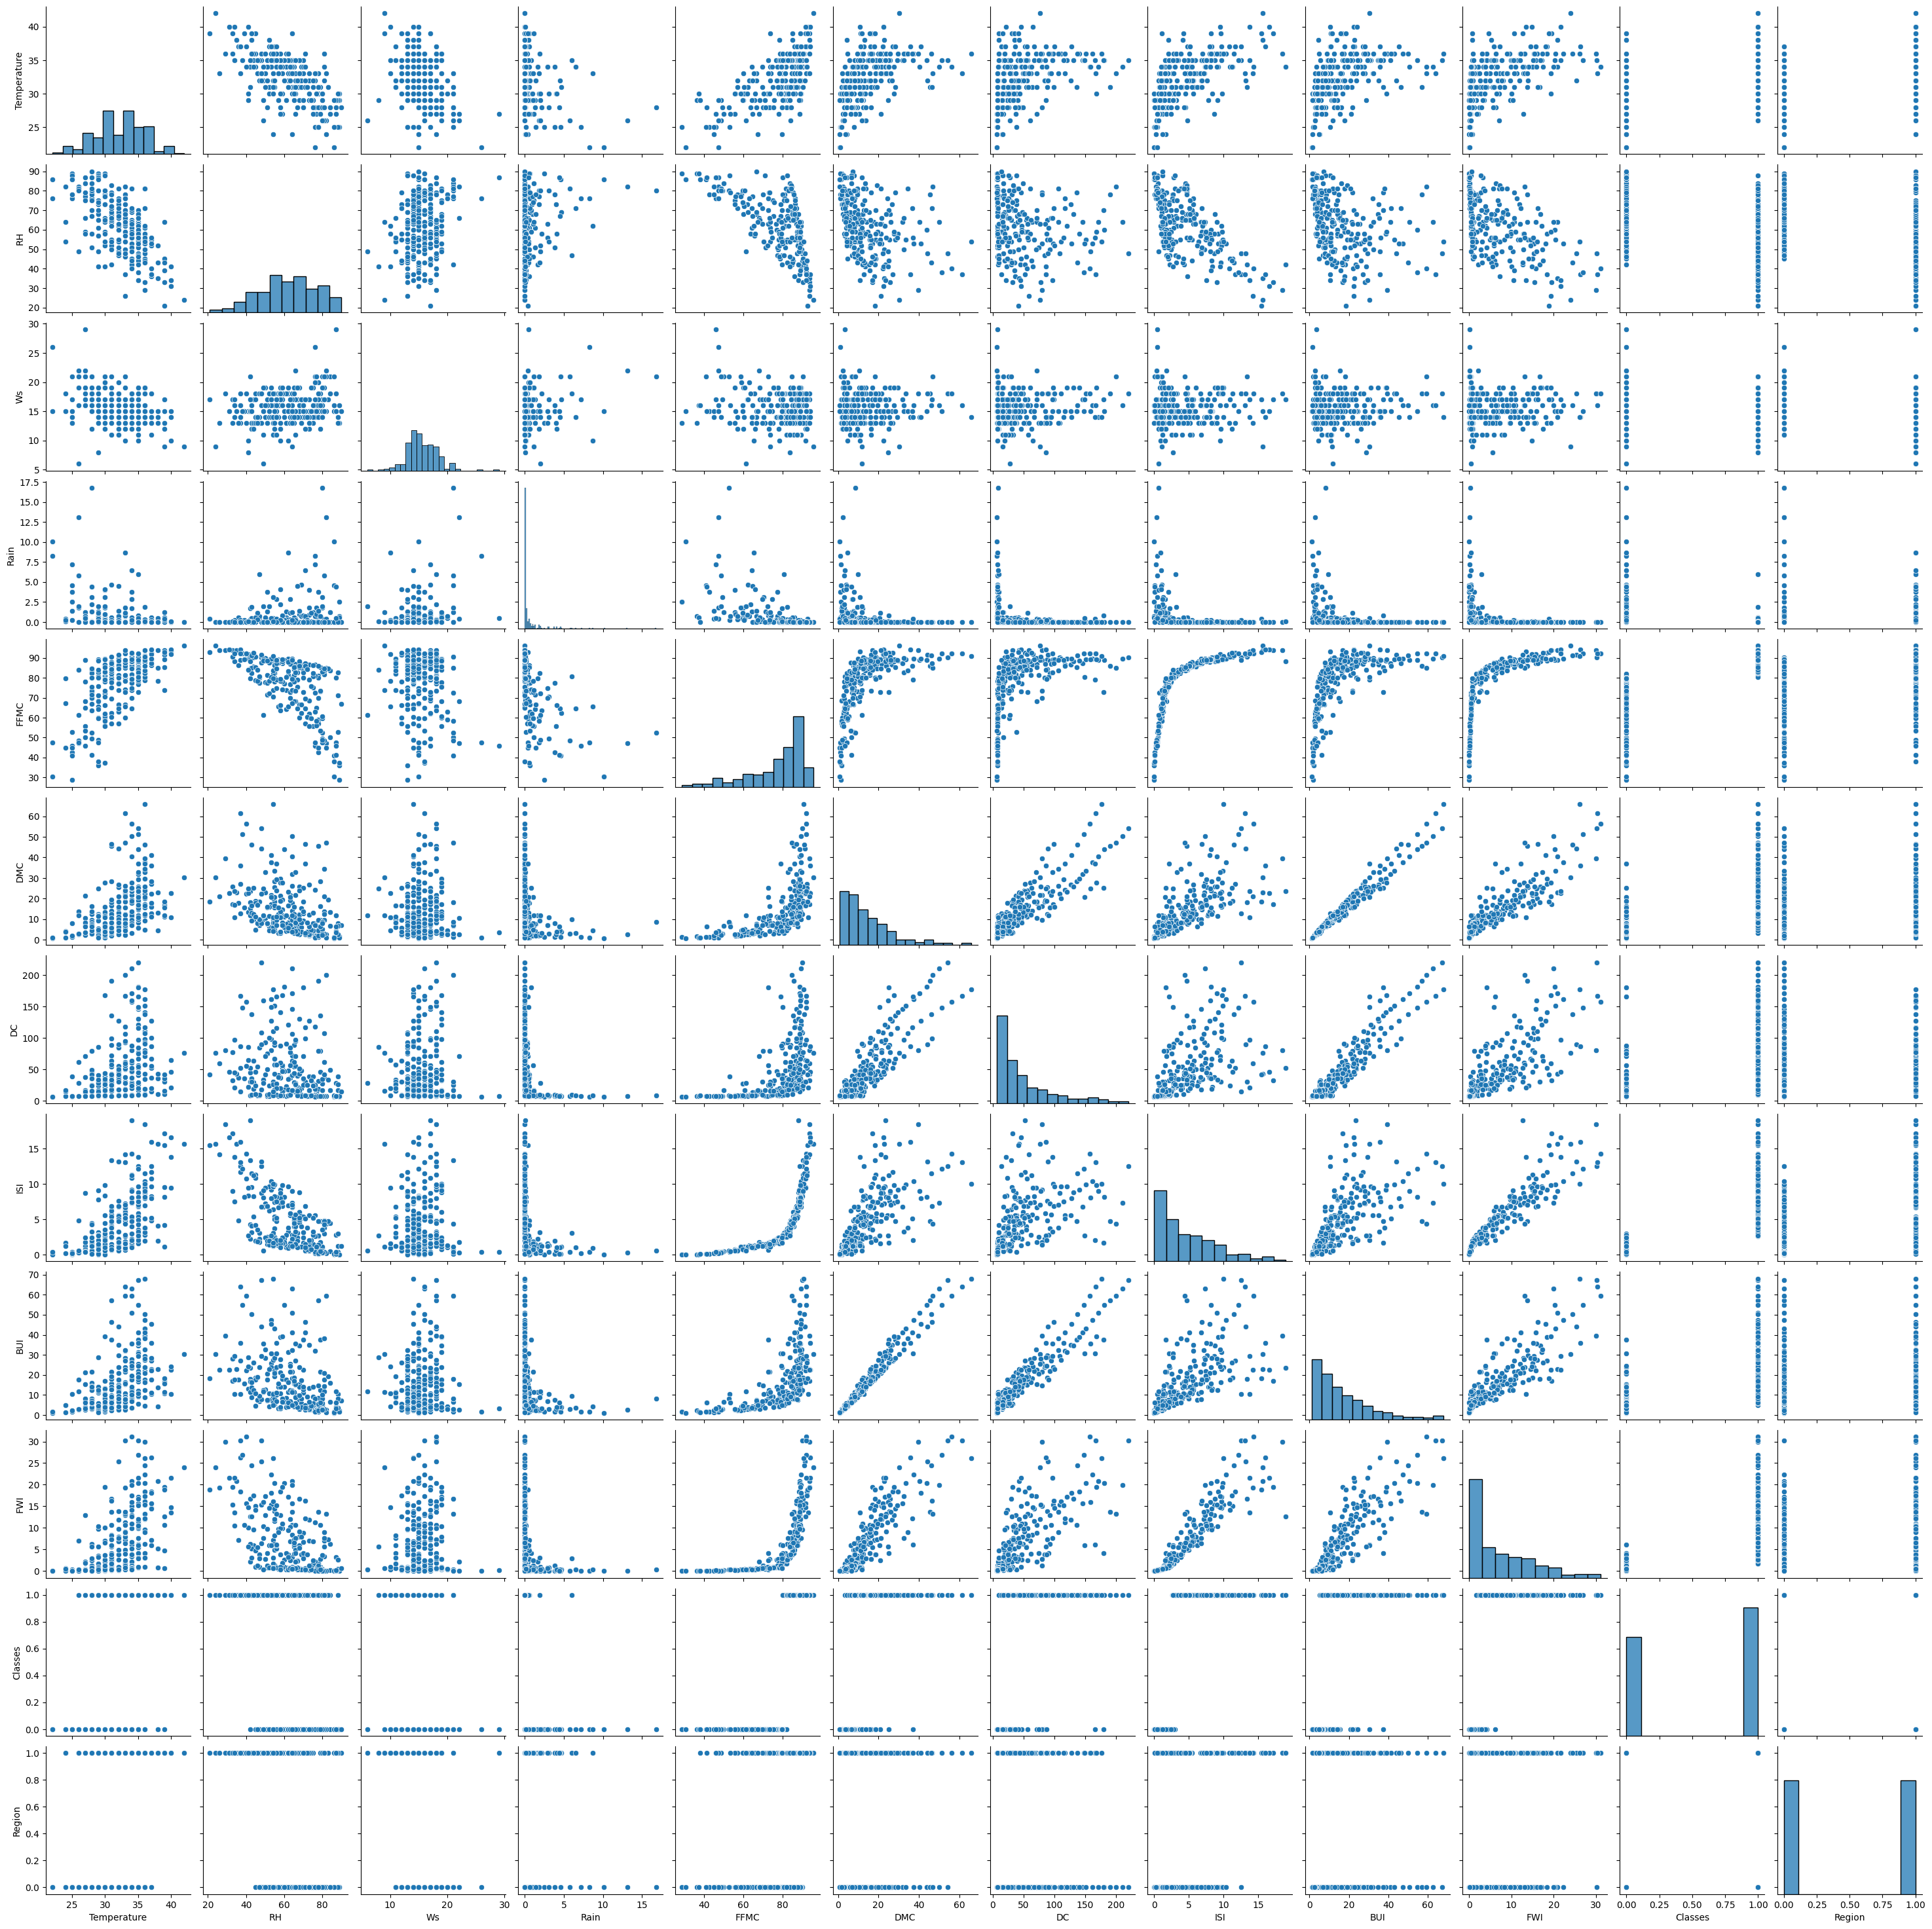

In [43]:
sns.pairplot(df_1)

In [44]:
# this show relationships but too many features we will find some new graph

### Correlation

In [45]:
df_1.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370511,0.607551,0.455504,0.566670,0.518119,0.273496
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220344,-0.690637,-0.348587,-0.580957,-0.435023,-0.406424
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076253,0.015248,0.029756,0.032368,-0.066529,-0.176829
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296808,-0.347105,-0.299171,-0.324422,-0.379449,-0.041080
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503919,0.739730,0.589652,0.691132,0.770114,0.224680
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875362,0.674499,0.982073,0.875864,0.584188,0.191094
DC,0.370511,-0.220344,0.076253,-0.296808,0.503919,0.875362,1.000000,0.498926,0.941906,0.739521,0.507132,-0.081482
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498926,1.000000,0.635891,0.922895,0.735511,0.268421
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.941906,0.635891,1.000000,0.857973,0.583882,0.087370
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


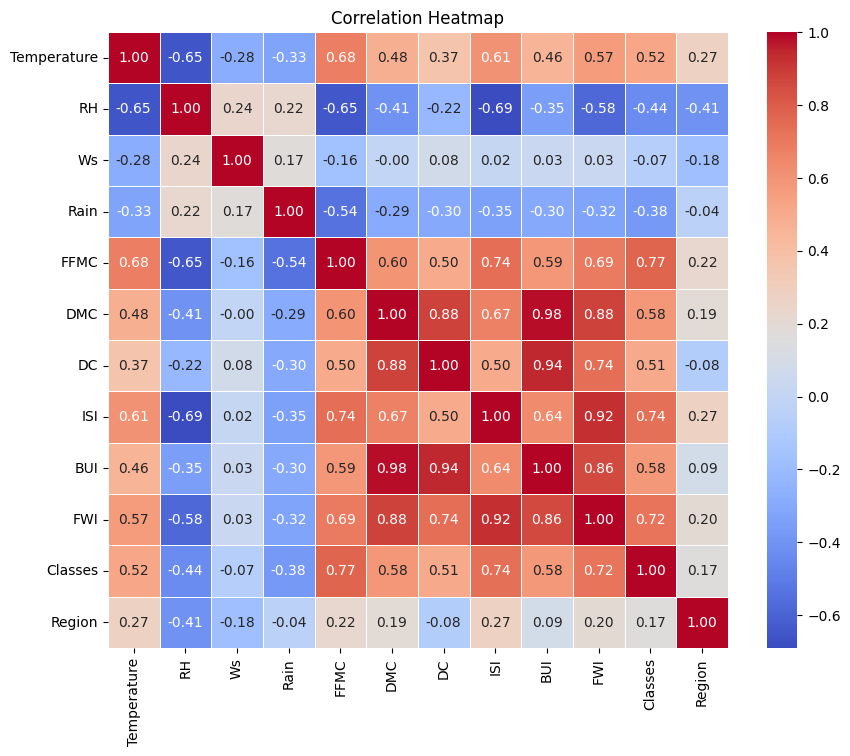

In [46]:
corr = df_1.corr()
# Create a heatmap
plt.figure(figsize=(10, 8))  # Optional: adjust the size of the figure
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the plot
plt.title('Correlation Heatmap')
plt.show()

In [47]:
# Calculate the correlation matrix
corr_matrix = df_1.corr()

# Get the correlation of all features with respect to the target variable
target_corr = corr_matrix['FWI'].sort_values(ascending=False)

print(target_corr)

FWI            1.000000
ISI            0.922895
DMC            0.875864
BUI            0.857973
DC             0.739521
Classes        0.719216
FFMC           0.691132
Temperature    0.566670
Region         0.197102
Ws             0.032368
Rain          -0.324422
RH            -0.580957
Name: FWI, dtype: float64


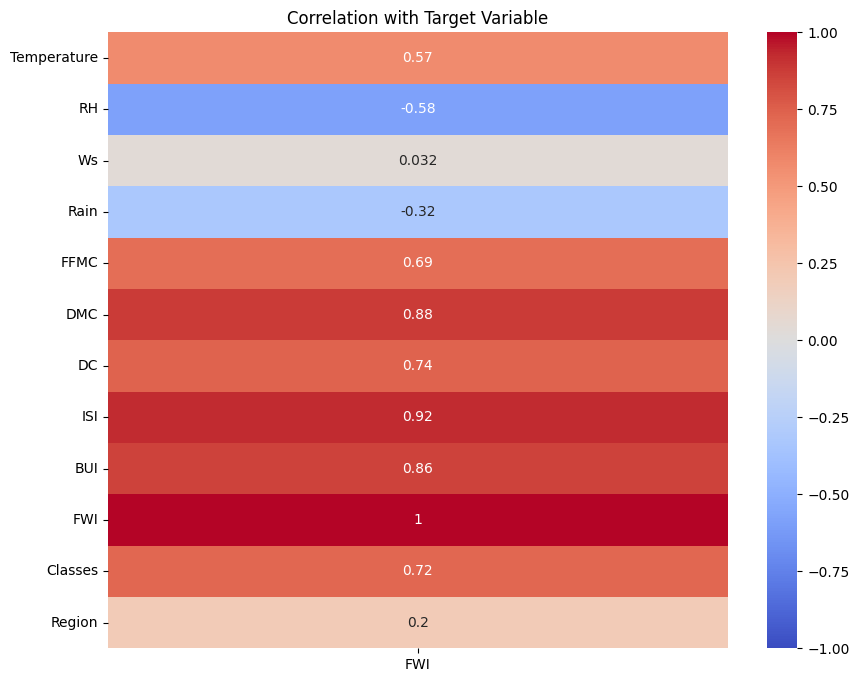

In [48]:
# Plot heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix[['FWI']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with Target Variable')
plt.show()

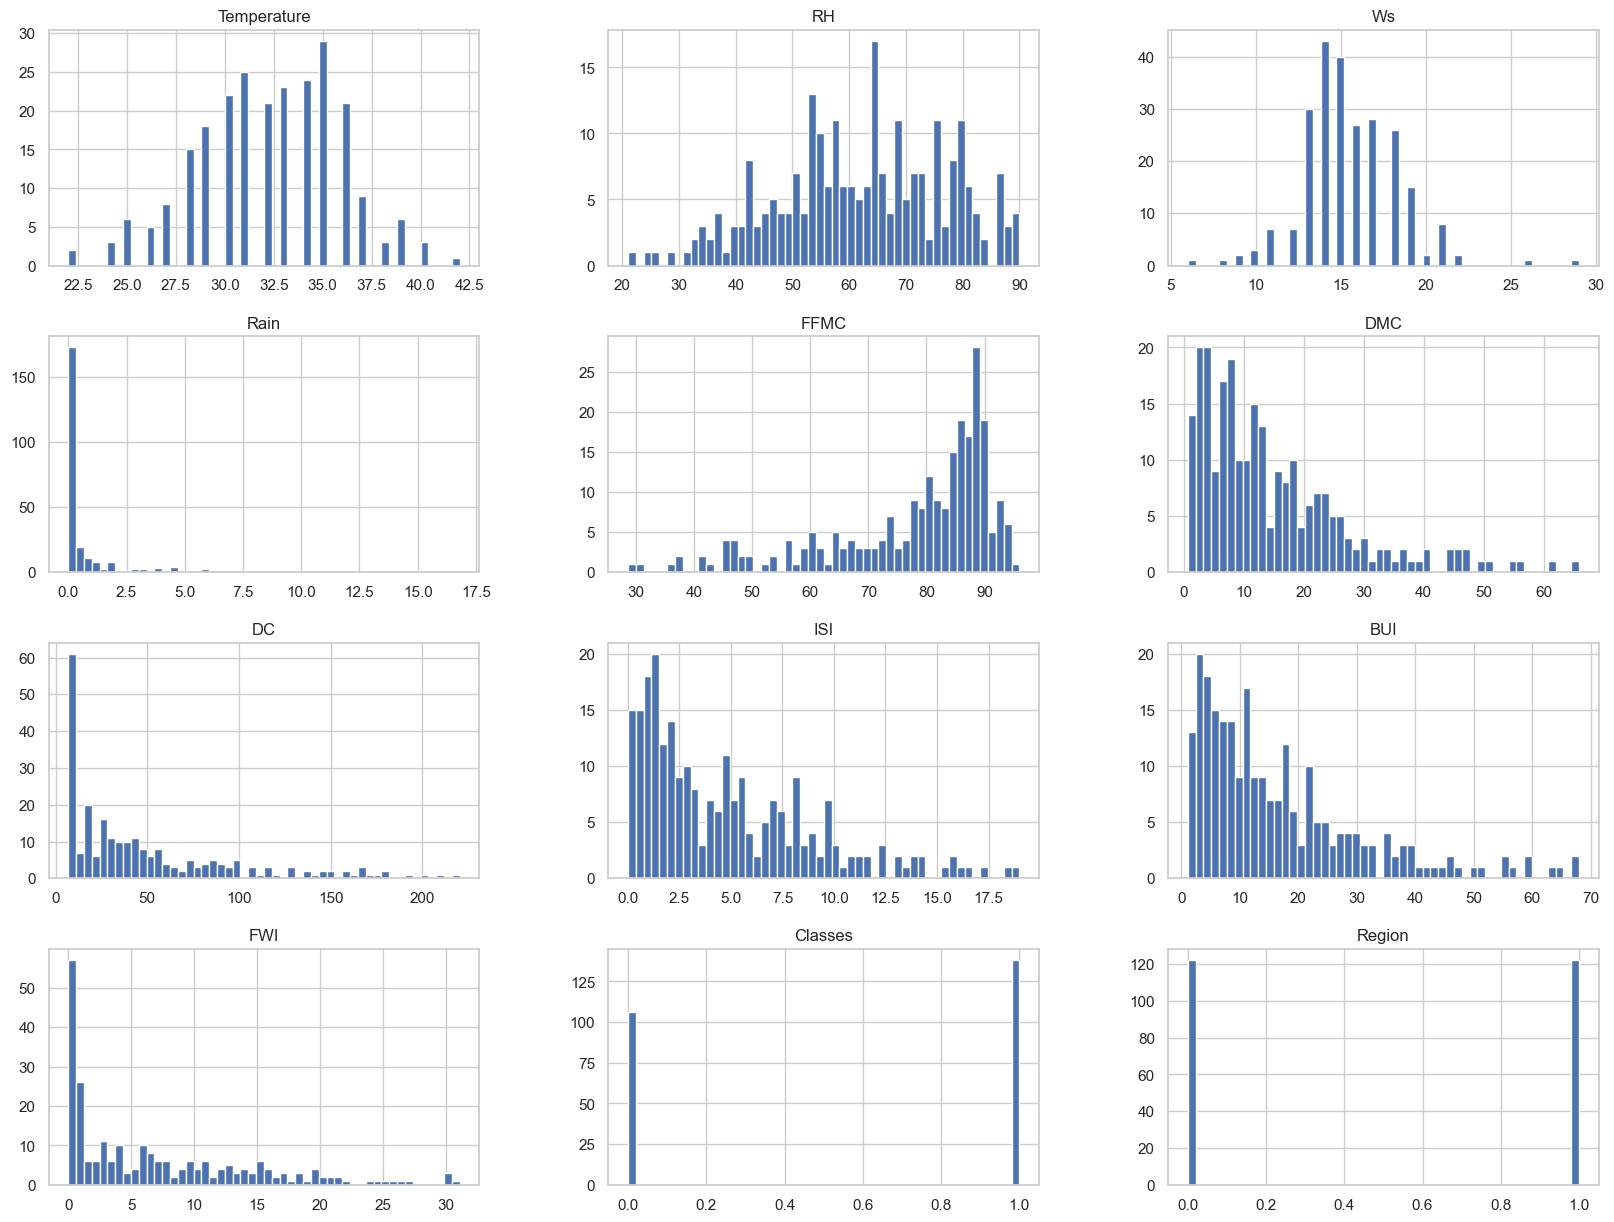

In [49]:
# Plot desnity plot for all feature
# Set the style to seaborn
sns.set(style="whitegrid")

# Plot histograms
df_1.hist(bins=50, figsize=(20, 15))

# Show the plot
plt.show()

In [50]:
# This shoows disturbution of all features

In [51]:
## Percentage for piechart
percentage = df_1["Classes"].value_counts(normalize = True)*100

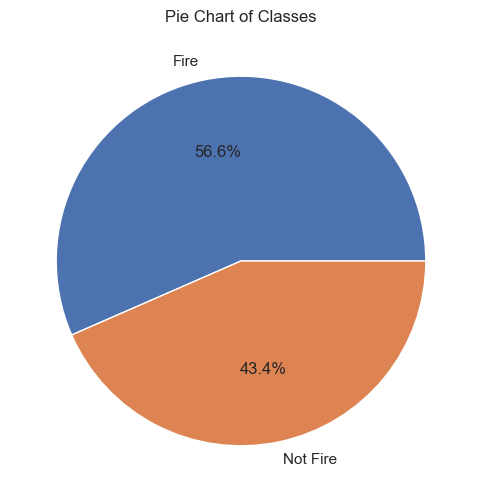

In [52]:
classlabel = ["Fire","Not Fire"]
plt.figure(figsize =(10,6))
plt.pie(percentage,labels = classlabel, autopct = '%1.1f%%')
plt.title("Pie Chart of Classes")
plt.show()

### BoxPlot

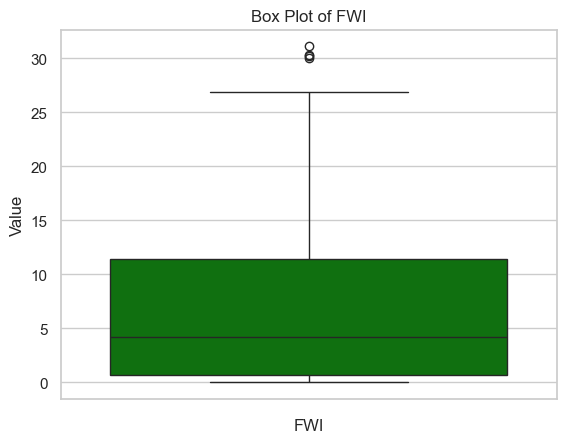

In [53]:
# Create the box plot
sns.boxplot(data=df_1["FWI"], color="green")

# Customize the plot
plt.title('Box Plot of FWI')
plt.xlabel('FWI')
plt.ylabel('Value')

# Show the plot
plt.show()

In [54]:
## Target value (Fwi)

## Monthly Fire Analysis

In [55]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [56]:
# Strip leading and trailing whitespace and normalize case
df['Classes'] = df['Classes'].str.strip().str.lower()

Text(0.5, 1.0, 'Fire Anlayis of Sidi-Bel Abbes Region')

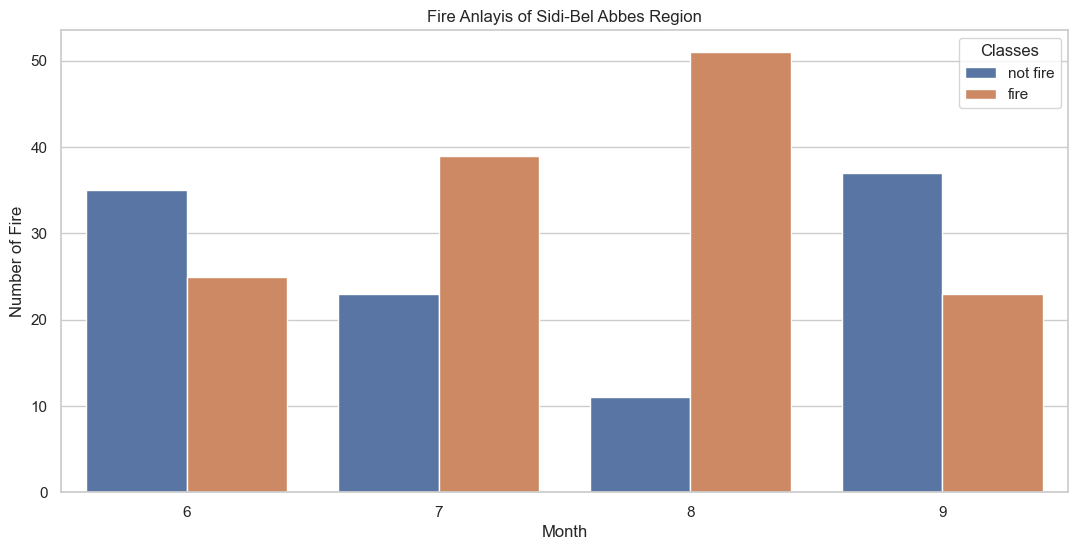

In [57]:
dsd = df.loc[df["Region"] ==1]
plt.subplots(figsize=(13,6))
sns.set_style("whitegrid")
sns.countplot(x="month", hue ="Classes" , data=df )
plt.ylabel("Number of Fire")
plt.xlabel("Month")
plt.title("Fire Anlayis of Sidi-Bel Abbes Region")

Text(0.5, 1.0, 'Fire Anlayis of Bejaia Region')

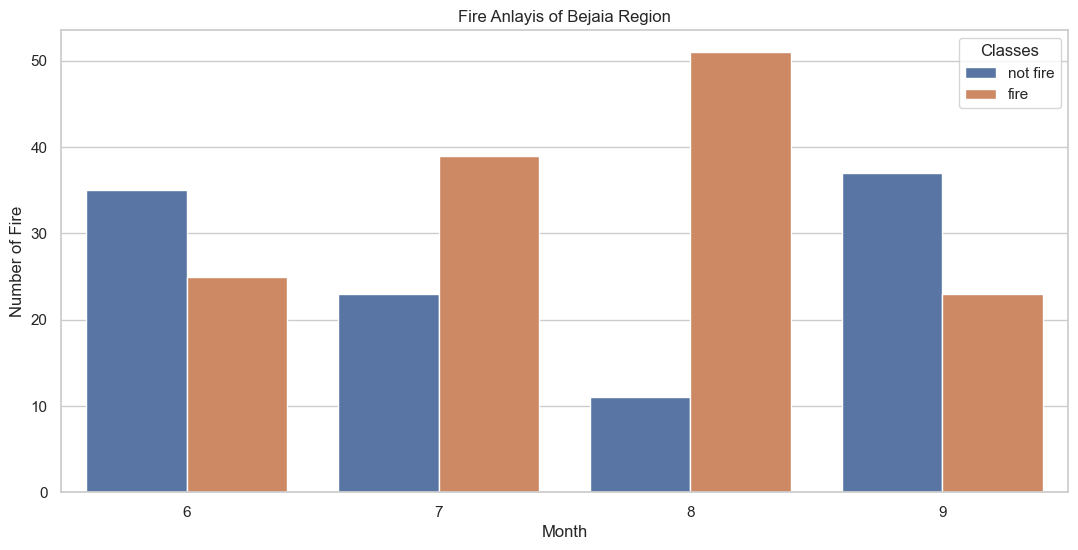

In [58]:
dsd = df.loc[df["Region"] ==0]
plt.subplots(figsize=(13,6))
sns.set_style("whitegrid")
sns.countplot(x="month", hue ="Classes" , data=df )
plt.ylabel("Number of Fire")
plt.xlabel("Month")
plt.title("Fire Anlayis of Bejaia Region")